+ Weekly Monthly

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html

https://stackoverflow.com/questions/20584627/how-do-you-pull-weekly-historical-data-from-yahoo-finance

```python
df.resample('W', how='mean')
```

index 를 DataTimeIndex로 변환하면 resampling을 할 수 있다.

+ Top 50 matplotlib  
https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/


# INDEX<a name="INDEX"></a>
---
+ [초기설정(필수)](#초기설정)
+ [심볼리스트 생성](#init)
+ [데이터 다운로드](#down)
+ [OLS 초기설정](#ols)
    + [1 변수](#1ols)
    + [2 변수](#2ols)
    + [3 변수](#3ols)
    + [4 변수](#4ols)
+ [Joint Plot](#joint)
+ [데이터확인](#확인)
+ [co-kurtosis - WIP](#cokur)

---

## Goal
미국 시장과 한국 시장의 관계 - IT하드웨어 대상

---

## Status
ols 결과 유의미한 R-squared 를 얻지못함


## Note
---
+ read_csv 에서 오류가 난다면 Analyze.py에

```pytho
engine = 'python'
```
를 추가해 줘보자.

```python
pd.read_csv('data/'+target_1 + '.csv',index_col='Date',engine='python')
```

+ csv 파일이 제대로 되어있는지 확인하여보자  
        메모장으로 열었을 시에 제대로 ',' 로 구분되어야한다.  
        엑셀 파일을 받아서 csv로 변환이 잘 안되는 경우가 있다.

+ 출력이 스크롤 안에 안 들어가게 하기  
        Cell -> All output (또는 Current outputs) -> toggle scrolling  
        또는 cell 선택후 'o'

### [초기 설정](#INDEX)<a name="초기설정"></a>
+ 한글 출력을 위한 폰트 설정, 각 PC마다 환경이 다름 ([matlplot 한글폰트](matlplot%20한글폰트.ipynb).ipynb 참고)
+ 사용할 지표들 등록

In [1]:
import SymbolList as sl
import Analysis as an
import Visualization as vi
import numpy as np
import pandas as pd
import datetime as dt 
from statsmodels.formula.api import ols 
import seaborn as sns;  sns.set()
import matplotlib.pyplot as plt
import matplotlib as mpl

# matplot 설정
mpl.rcParams['axes.unicode_minus'] = False
# -*- coding: utf-8 -*-
plt.rc('font', family="NanumGothic")
# 리스트 설정
ten_kor = ['Samsung_Electronics','SK_hynix','LG_Electronics',
    '삼성SDI','엔씨소프트','카카오','삼성전기',
    'LG디스플레이','삼성SDS','네이버']
ten_US = [  'Apple','Microsoft','IBM','Oracle',
            'Amazon','Tesla','Alphabet','Facebook',
            'Cisco','타이완 반도체','Intel','오라클','SAP']
index_kor = '와이즈'
#index_US = 'IXT'
index_US = 'XLK'
#stan_US = ['IXT','VIX','BitCoin','MSCI','ten_Year_Treasury']
stan_US = ['XLK','VIX','BitCoin','MSCI','ten_Year_Treasury']

### 지표 설명
+ [와이즈](http://www.wiseindex.com/Index/Index#/WI610.0) - 와이즈 IT하드웨어 지수
+ [IXT](https://finance.yahoo.com/quote/%5EIXT?p=^IXT&.tsrc=fin-srch) : TECHNOLOGY SELECT SECTOR INDEX  - 현재 미사용, 온전한 3년치를 얻을 방법을 못 찾음
+ [XLK](https://finance.yahoo.com/quote/XLK?p=XLK&.tsrc=fin-srch): Technology Select Sector SPDR Fund 
+ [VIX](https://finance.yahoo.com/quote/ZM?p=ZM&.tsrc=fin-srch) : VelocityShares Daily 2x VIX Short-Term ETN(a.k.a 공포지수), S&P500지수 옵션 가격의 향후 30일 동안의 변동성에 대한 시장의 기대
+ [MSCI](https://finance.yahoo.com/quote/EEM?p=EEM&.tsrc=fin-srch) : iShares MSCI Emerging Markets ETF
+ [ten_Year_Treasury](https://finance.yahoo.com/quote/IEF?p=IEF&.tsrc=fin-srch) : iShares 7-10 Year Treasury Bond ETF

### Doc
+ 시간대 조절(WIP)  
    https://www.geeksforgeeks.org/python-pandas-dataframe-shift/
**note** : 이것이 유의미한 차이를 보일까?

--- 

+ 한국 기업 ~IXT(XLK로 대체)+ VIX + 비트코인 + 미국 금리(DGS10) + MSCI

# [OLS 초기설정](#INDEX)<a name="ols"></a>
ols 도 함수화 해야한다.

In [2]:
show_summary = False
use_pct_change = True
do_shift = True # 휴일 갭과 요일 갭을 잘 고려해야함. 지금 상태는 좀 아닌듯. 

import itertools as it
start='2016-01-04'
end='2018-12-28'
ols_ind=[]
for i in stan_US:
    tmp = pd.read_csv('data/'+i+'.csv',index_col='Date',engine='c')
    tmp = tmp[['Close']]
    tmp = tmp.loc[start:end]
    tmp.columns = [i]
    ols_ind.append(tmp)
    
ols_dep1 = pd.read_csv('data/Samsung_Electronics.csv',index_col='Date',engine='c')
ols_dep1 = ols_dep1[['Close']]
ols_dep1 = ols_dep1.loc[start:end]
ols_dep1.columns = ['Samsung_Electronics']
"""
if(do_shift):
    ols_dep1 = ols_dep1.shift(-1, axis = 0) 
    ols_dep1.dropna(inplace=True)
display(ols_dep1.head())
ols_dep1.resample('W', how='mean')
display(ols_dep1.head())
    
    """
ols_dep2 = pd.read_csv('data/네이버.csv',index_col='Date',engine='c')
ols_dep2 = ols_dep2[['Close']]
ols_dep2 = ols_dep2.loc[start:end]
ols_dep2.columns = ['네이버']
if(do_shift):
    ols_dep2 = ols_dep2.shift(-1, axis = 0) 
    ols_dep2.dropna(inplace=True)

### [1 Var OLS](#INDEX)<a name="1ols"></a>

0.002520722678767351 :삼성전자 ~ XLK
0.0073720302039680385 :삼성전자 ~ VIX
0.0006339810351599917 :삼성전자 ~ BitCoin
0.025702856408598707 :삼성전자 ~ MSCI
0.000866515004613766 :삼성전자 ~ ten_Year_Treasury


[0.0006339810351599917, 0.1430382479753007]

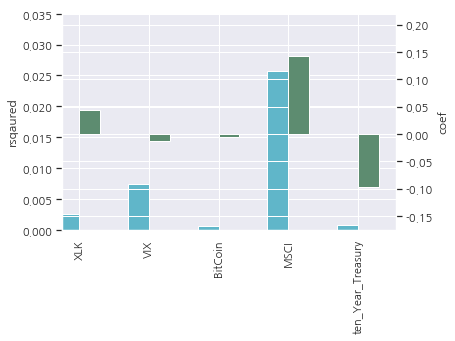

0.008626353177846213 : 네이버 ~ XLK
0.009143846433976255 : 네이버 ~ VIX
3.0465103218024758e-05 : 네이버 ~ BitCoin
0.008542870399437685 : 네이버 ~ MSCI
2.133724792374725e-05 : 네이버 ~ ten_Year_Treasury


[2.133724792374725e-05, 0.09705353911801481]

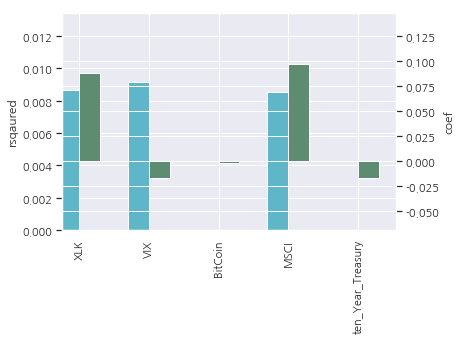

In [3]:
ret_df = pd.DataFrame(index=stan_US, columns=['rsqaured','coef'])

for idx in range(len(ols_ind)):
    ols_df = pd.concat([ols_dep1, ols_ind[idx]], axis=1, sort=False)
    if(use_pct_change):
        ols_df = ols_df.pct_change()
    ols_df = ols_df[ols_df.select_dtypes(include=['number']).columns] * 100
    ols_df = ols_df.dropna()
    model_fit = ols('Samsung_Electronics'+'~1+'+stan_US[idx],data=ols_df).fit()
    print(model_fit.rsquared, end='')
    print(' :삼성전자 ~ '+ stan_US[idx])
    if(show_summary):
        print(model_fit.summary())
        
    ret_df.loc[stan_US[idx]]=[model_fit.rsquared,model_fit.params.values[1]]
    #rs.append(model_fit.rsquared)

vi.bar_2(ret_df)

for idx in range(len(ols_ind)):
    ols_df = pd.concat([ols_dep2, ols_ind[idx]], axis=1, sort=False)
    if(use_pct_change):
        ols_df = ols_df.pct_change()
    ols_df = ols_df[ols_df.select_dtypes(include=['number']).columns] * 100
    ols_df = ols_df.dropna()
    model_fit = ols('네이버'+'~1+'+stan_US[idx],data=ols_df).fit()
    print(model_fit.rsquared, end='')
    print(' : 네이버 ~ ' + stan_US[idx])
    if(show_summary):
        print(model_fit.summary())
    ret_df.loc[stan_US[idx]]=[model_fit.rsquared,model_fit.params.values[1]]    
        
        
vi.bar_2(ret_df)

### [2 Var OLS](#INDEX)<a name="2ols"></a>

Empty DataFrame
Columns: [rsqaured, XLK, VIX, BitCoin, MSCI, ten_Year_Treasury]
Index: []
0.00770 :삼성전자 ~ XLK + VIX
0.00376 :삼성전자 ~ XLK + BitCoin
0.03962 :삼성전자 ~ XLK + MSCI
0.00256 :삼성전자 ~ XLK + ten_Year_Treasury
0.00765 :삼성전자 ~ VIX + BitCoin
0.02596 :삼성전자 ~ VIX + MSCI
0.00791 :삼성전자 ~ VIX + ten_Year_Treasury
0.02670 :삼성전자 ~ BitCoin + MSCI
0.00156 :삼성전자 ~ BitCoin + ten_Year_Treasury
0.02586 :삼성전자 ~ MSCI + ten_Year_Treasury
0.01248 :네이버 ~ XLK + VIX
0.00998 :네이버 ~ XLK + BitCoin
0.00977 :네이버 ~ XLK + MSCI
0.01141 :네이버 ~ XLK + ten_Year_Treasury
0.00921 :네이버 ~ VIX + BitCoin
0.01226 :네이버 ~ VIX + MSCI
0.00921 :네이버 ~ VIX + ten_Year_Treasury
0.00862 :네이버 ~ BitCoin + MSCI
0.00005 :네이버 ~ BitCoin + ten_Year_Treasury
0.00904 :네이버 ~ MSCI + ten_Year_Treasury


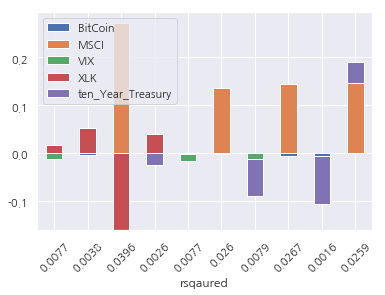

In [14]:
ret_df = pd.DataFrame(columns=['rsqaured',*stan_US])
print(ret_df.head())
com = it.combinations(range(len(stan_US)), 2)

num_var = 2
vals=[]
for idx in com:
    ols_df = pd.concat([ols_dep1, ols_ind[idx[0]],ols_ind[idx[1]]], axis=1, sort=False)
    if(use_pct_change):
        ols_df = ols_df.pct_change()
    ols_df = ols_df.dropna()
    model_fit = ols('Samsung_Electronics'+'~1+'+stan_US[idx[0]]+'+'+stan_US[idx[1]],data=ols_df).fit()
    print('%.5f'%(model_fit.rsquared), end='')
    print(' :삼성전자 ~ '+ stan_US[idx[0]] +' + '+stan_US[idx[1]])
    if(show_summary):
        print(model_fit.summary())  
    temp_df = pd.DataFrame( {'rsqaured':model_fit.rsquared,stan_US[idx[0]]:[model_fit.params.values[1]], stan_US[idx[1]]:[model_fit.params.values[2]]})
    ret_df = ret_df.append(temp_df)    
ret_df['rsqaured'] = ret_df['rsqaured'].round(4)    
ret_df = ret_df.set_index('rsqaured')    
ret_df.plot(kind='bar', stacked=True, rot=45);
        
com = it.combinations(range(len(stan_US)), 2)  
for idx in com:
    ols_df = pd.concat([ols_dep2, ols_ind[idx[0]],ols_ind[idx[1]]], axis=1, sort=False)
    if(use_pct_change):
        ols_df = ols_df.pct_change()
    ols_df = ols_df.dropna()
    model_fit = ols('네이버'+'~1+'+stan_US[idx[0]]+'+'+stan_US[idx[1]],data=ols_df).fit()
    print('%.5f'%(model_fit.rsquared), end='')
    print(' :네이버 ~ '+ stan_US[idx[0]] +' + '+stan_US[idx[1]])
    if(show_summary):
        print(model_fit.summary())

### [3 Var OLS](#INDEX)<a name="3ols"></a>

In [ ]:
com = it.combinations(range(len(stan_US)), 3)
for idx in com:
    ols_df = pd.concat([ols_dep1, ols_ind[idx[0]],ols_ind[idx[1]],ols_ind[idx[2]]], axis=1, sort=False)
    if(use_pct_change):
        ols_df = ols_df.pct_change()
    ols_df = ols_df.dropna()
    model_fit = ols('Samsung_Electronics'+'~1+'+stan_US[idx[0]]+'+'+stan_US[idx[1]]+'+'+stan_US[idx[2]],data=ols_df).fit()
    print('%.5f'%(model_fit.rsquared), end='')
    print(' :삼성전자 ~ '+ stan_US[idx[0]] +' + '+stan_US[idx[1]]+' + '+stan_US[idx[2]])
    if(show_summary):
        print(model_fit.summary())
        

com = it.combinations(range(len(stan_US)), 3)  
for idx in com:
    ols_df = pd.concat([ols_dep2, ols_ind[idx[0]],ols_ind[idx[1]],ols_ind[idx[2]]], axis=1, sort=False)
    if(use_pct_change):
        ols_df = ols_df.pct_change()
    ols_df = ols_df.dropna()
    model_fit = ols('네이버'+'~1+'+stan_US[idx[0]]+'+'+stan_US[idx[1]] + '+'+stan_US[idx[2]],data=ols_df).fit()
    print('%.5f'%(model_fit.rsquared), end='')
    print(' :네이버 ~ '+ stan_US[idx[0]] +' + '+stan_US[idx[1]]+ ' + ' + stan_US[idx[2]])
    if(show_summary):
        print(model_fit.summary())

### [4 Var OLS](#INDEX)<a name="4ols"></a>

In [ ]:
com = it.combinations(range(len(stan_US)), 4)
for idx in com:
    ols_df = pd.concat([ols_dep1, ols_ind[idx[0]],ols_ind[idx[1]],ols_ind[idx[2]],ols_ind[idx[3]]], axis=1, sort=False)
    if(use_pct_change):
        ols_df = ols_df.pct_change()
    ols_df = ols_df.dropna()
    model_fit = ols('Samsung_Electronics'+'~1+'+stan_US[idx[0]]+'+'+stan_US[idx[1]]+'+'+stan_US[idx[2]]+'+'+stan_US[idx[3]],data=ols_df).fit()
    print('%.5f'%(model_fit.rsquared), end='')
    print(' :삼성전자 ~ '+ stan_US[idx[0]] +' + '+stan_US[idx[1]]+' + '+stan_US[idx[1]]+' + '+stan_US[idx[2]]+' + '+stan_US[idx[3]])
    if(show_summary):
        print(model_fit.summary())
com = it.combinations(range(len(stan_US)), 4)  
for idx in com:
    ols_df = pd.concat([ols_dep2, ols_ind[idx[0]],ols_ind[idx[1]],ols_ind[idx[2]],ols_ind[idx[3]]], axis=1, sort=False)
    if(use_pct_change):
        ols_df = ols_df.pct_change()
    ols_df = ols_df.dropna()
    model_fit = ols('네이버'+'~1+'+stan_US[idx[0]]+'+'+stan_US[idx[1]] + '+'+stan_US[idx[2]] + '+'+stan_US[idx[3]],data=ols_df).fit()
    print('%.5f'%(model_fit.rsquared), end='')
    print(' :네이버 ~ '+ stan_US[idx[0]] +' + '+stan_US[idx[1]]+ ' + ' + stan_US[idx[1]]+' + '+stan_US[idx[2]]+' + '+stan_US[idx[3]])
    if(show_summary):
        print(model_fit.summary())

# [데이터 확인](#INDEX)<a name="확인"></a>

2016년부터 2018년 까지의 데이터 plotting.

In [ ]:
an.isValid(stan_US)

plotting : Samsung_Electronics
plotting : SK_hynix
plotting : LG_Electronics
plotting : 삼성SDI
plotting : 엔씨소프트
plotting : 카카오
plotting : 삼성전기
plotting : LG디스플레이
plotting : 삼성SDS
plotting : 네이버


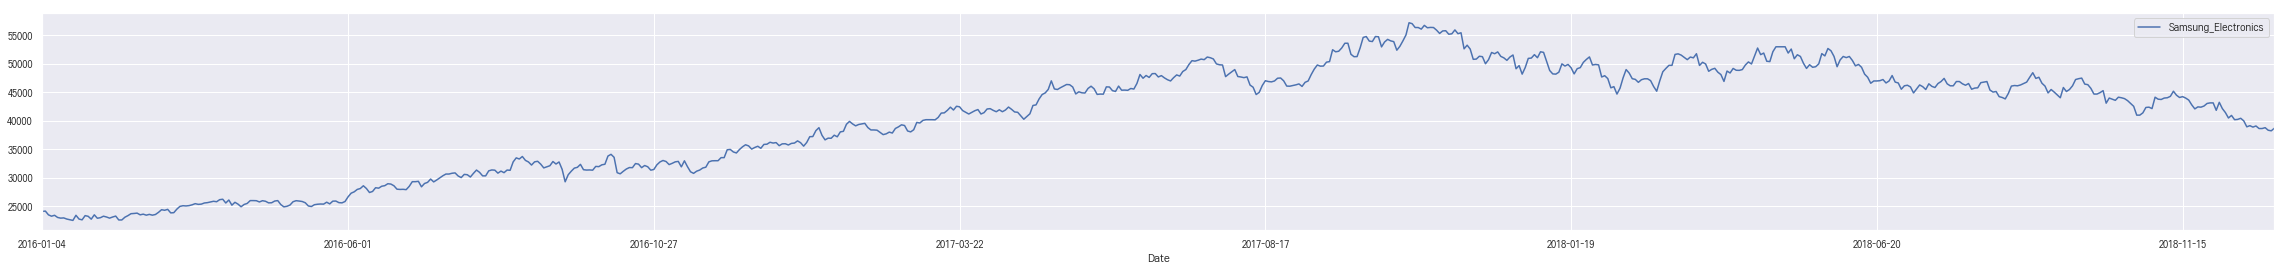

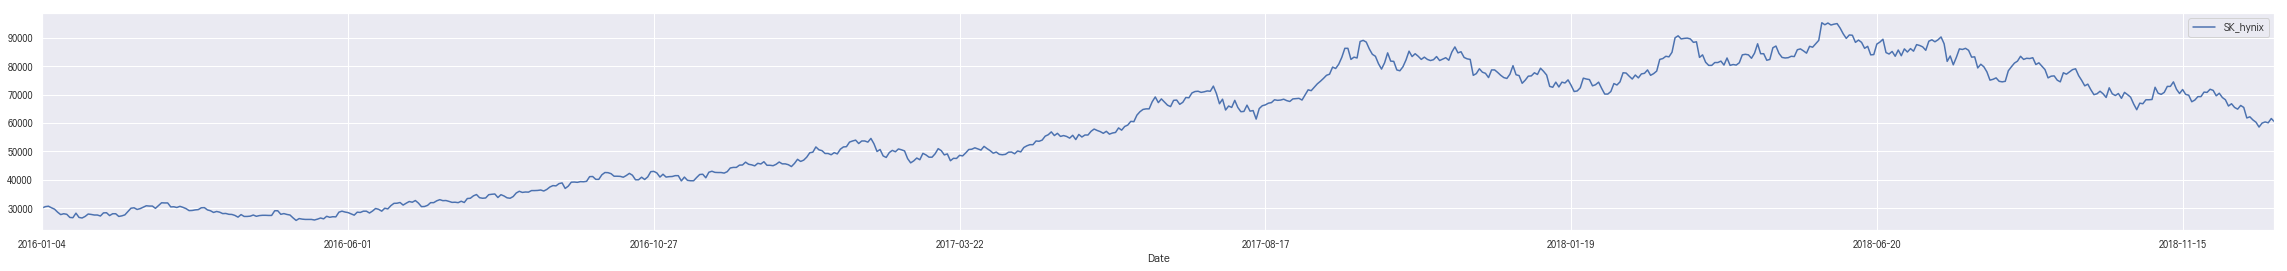

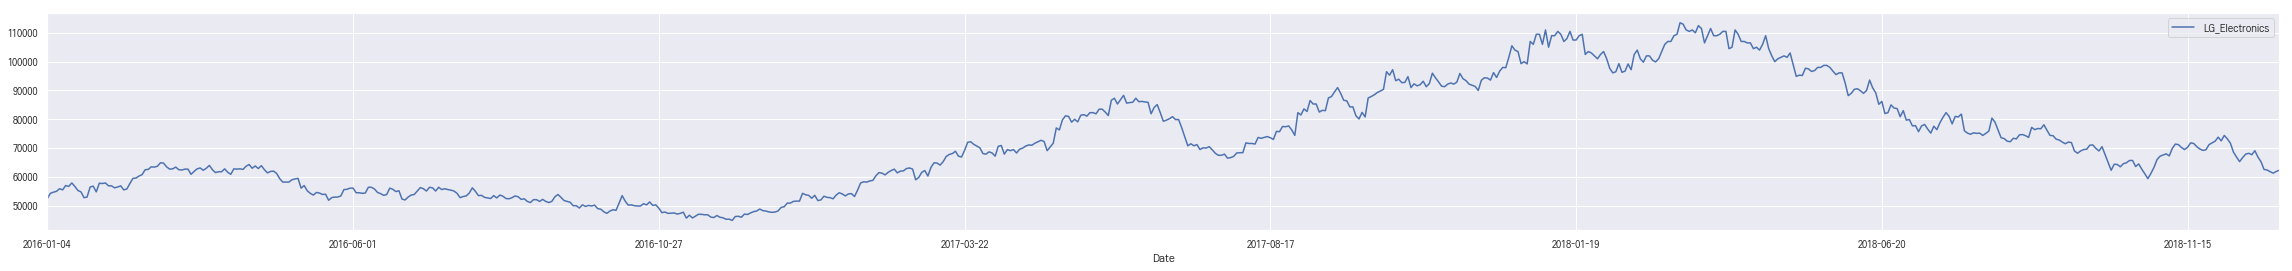

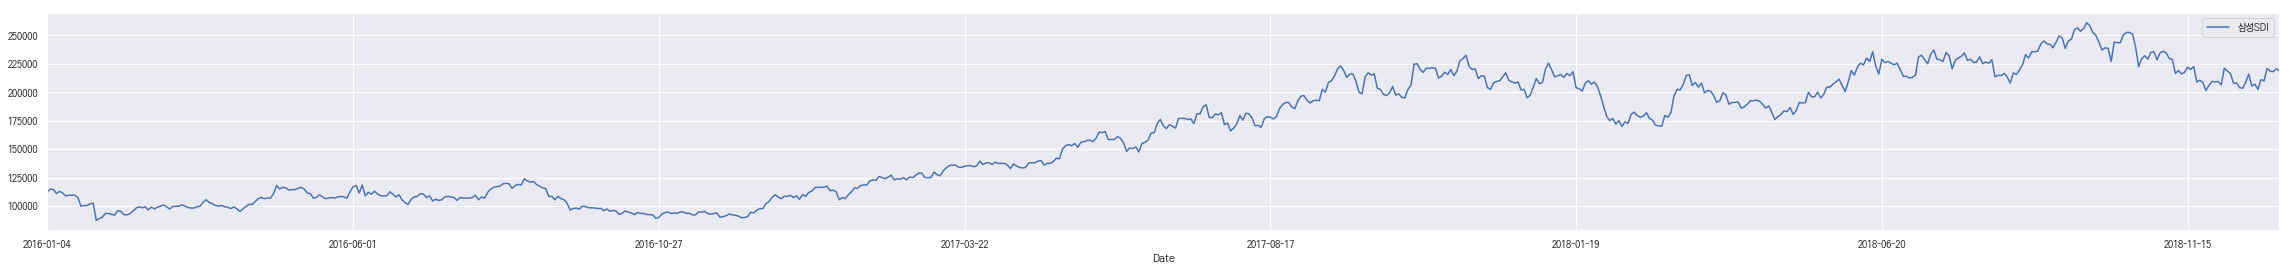

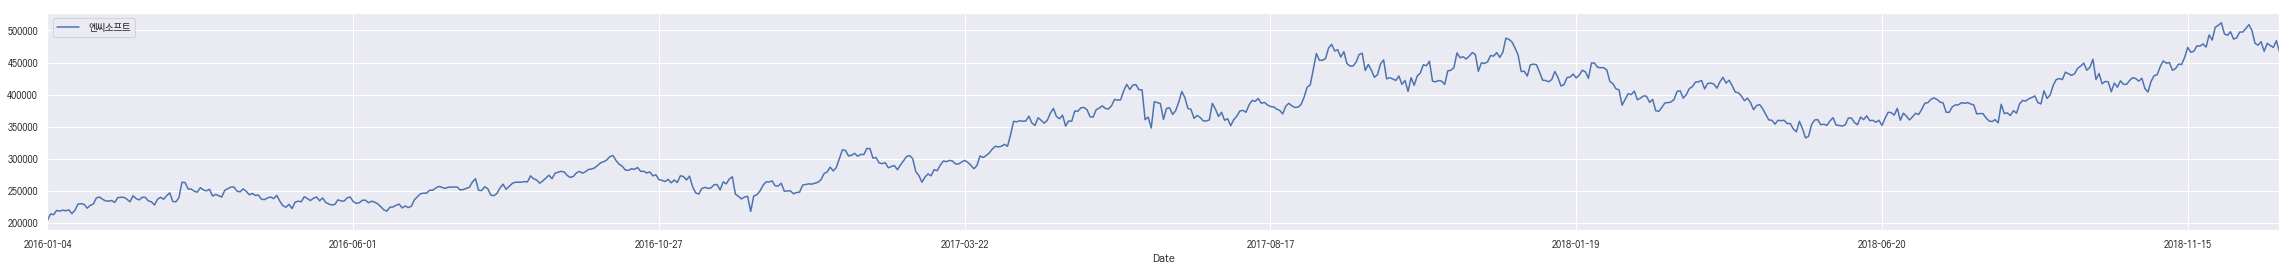

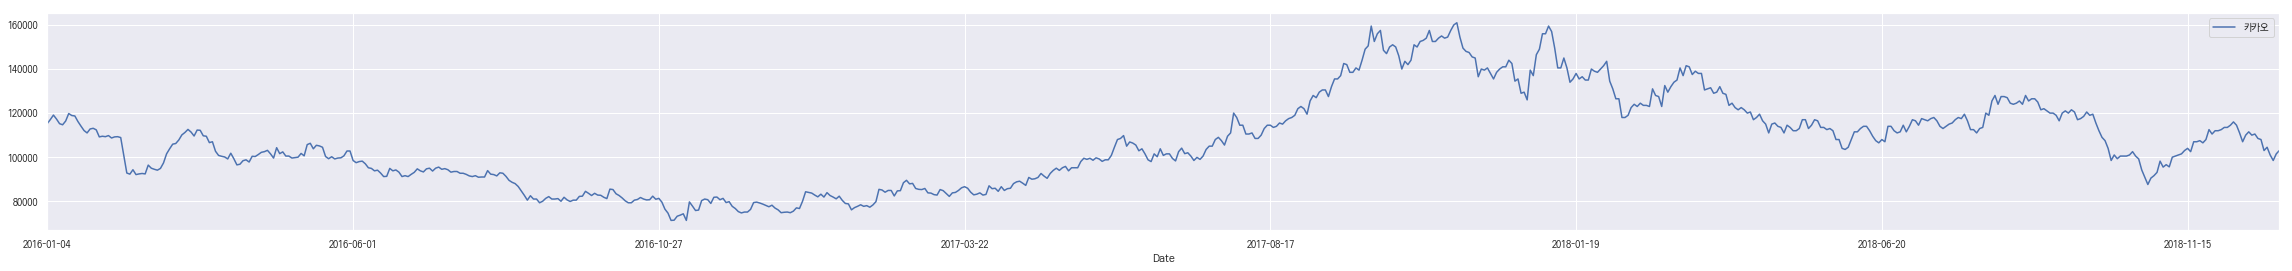

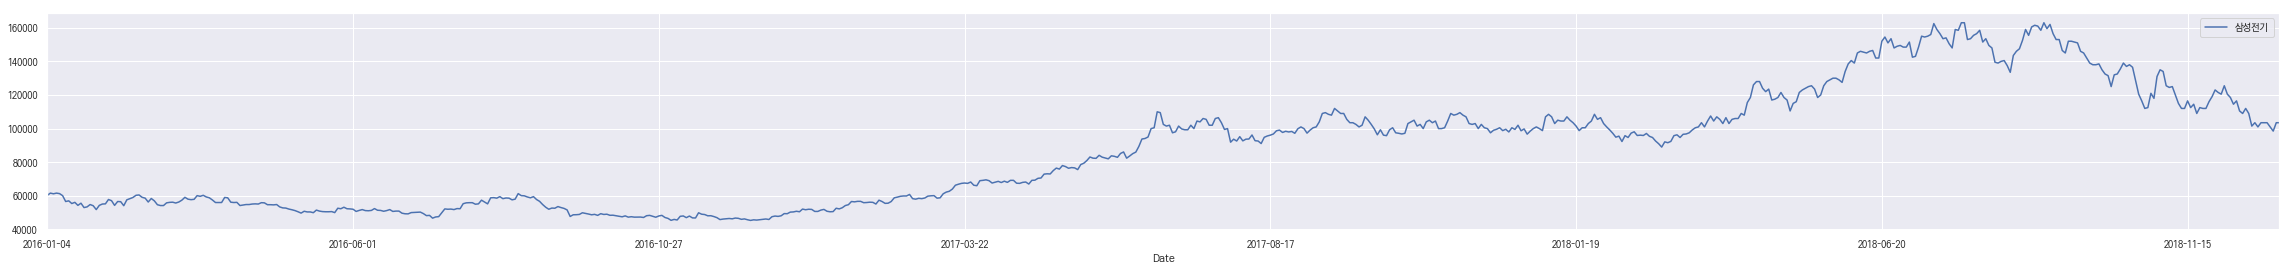

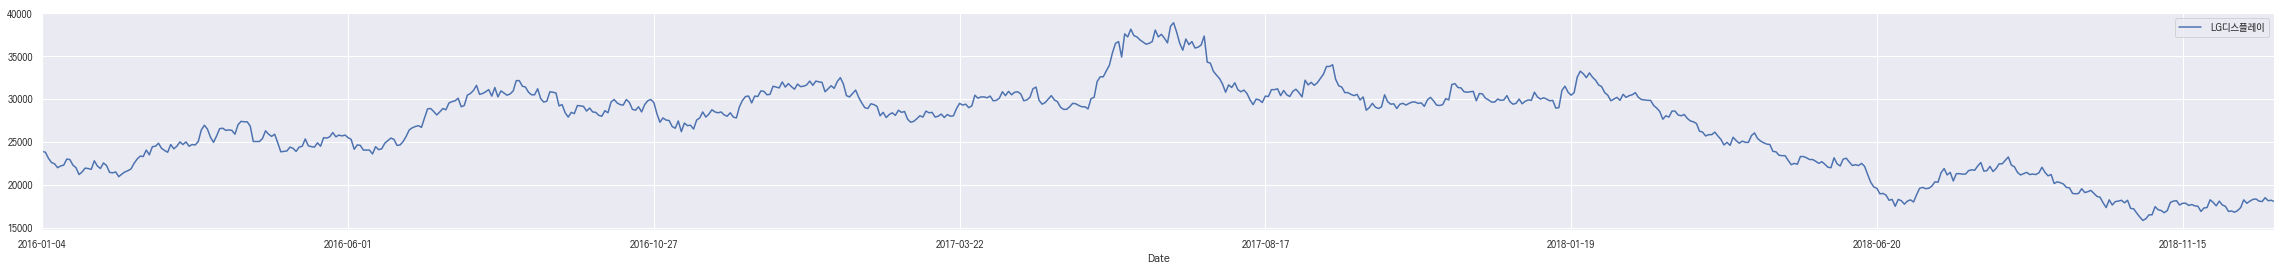

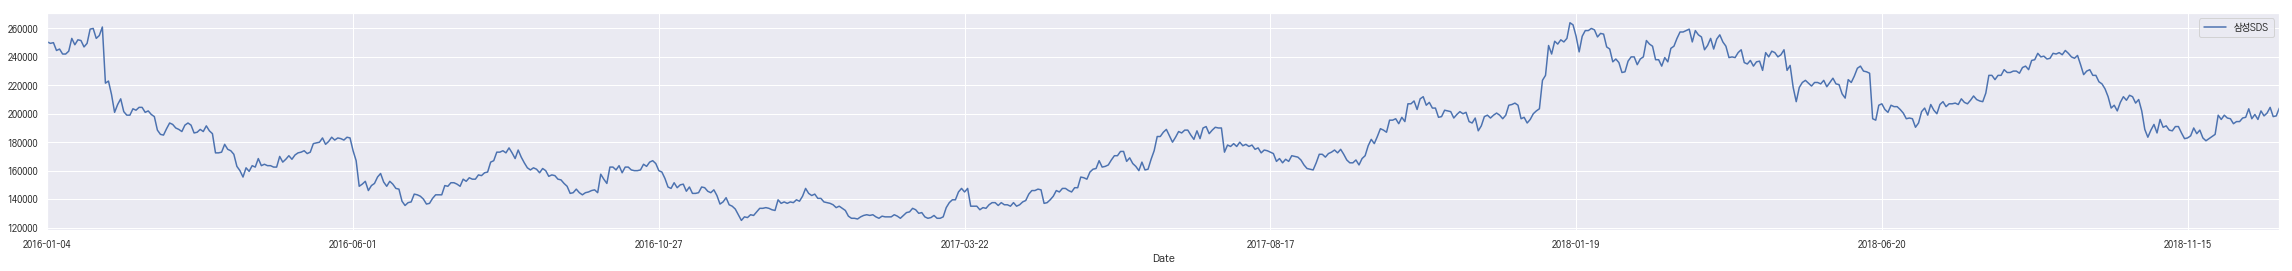

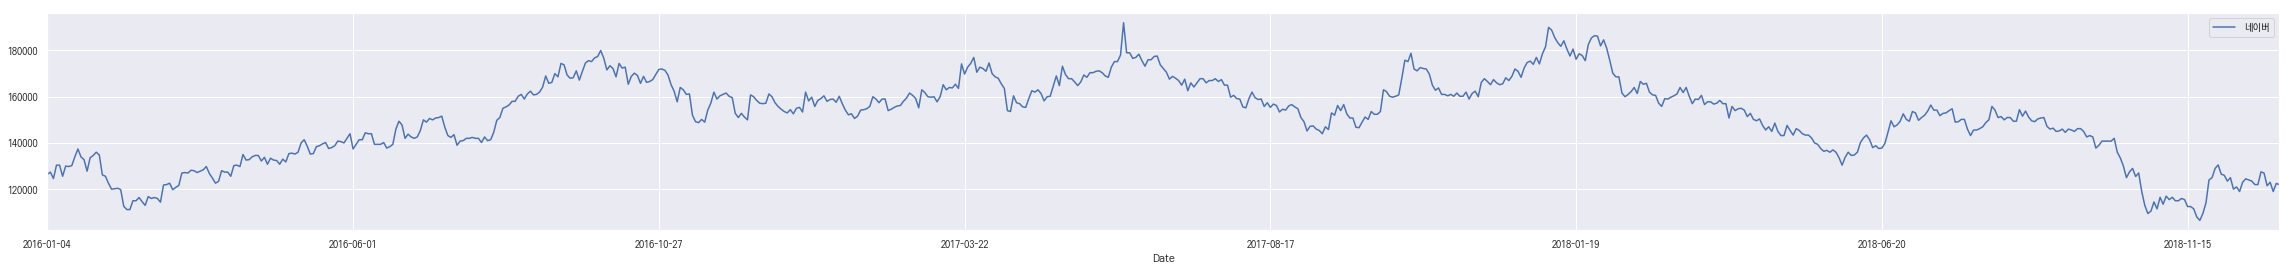

In [19]:
an.isValid(ten_kor)
#an.isValid(ten_US)

# [Symbol List 초기화 & 불러오기](#INDEX)<a name="init"></a>
+ IXT 같은 index 는 잘 안불러진다.
+ 잘 받았는지 검증하는 루틴이 필요함. 

In [3]:
df = sl.init_symbol_DF()
sl.add_symbol(df,'삼성SDS','018260.KS',init=True)
df = sl.init_symbol_DF()

ADD : 삼성SDS
ADD : Oracle
ADD : Apple
ADD : SK_hynix
ADD : Intel
ADD : 네이버
ADD : Tesla
ADD : XLK
ADD : 삼성전기
ADD : ten_Year_Treasury
ADD : 오라클
ADD : LG디스플레이
ADD : Microsoft
ADD : 카카오
DUP : 삼성SDS
ADD : 타이완 반도체
ADD : SAP
ADD : Samsung_Electronics
ADD : Cisco
ADD : Alphabet
ADD : Amazon
ADD : BitCoin
ADD : MSCI
ADD : IBM
ADD : 엔씨소프트
ADD : Facebook
ADD : 삼성SDI
ADD : LG_Electronics
ADD : VIX


# [Symbol List 에서 데이터 받기](#INDEX)<a name="down"></a>

TODO::이전에 받은 날짜에 이어서 붙이는거 추가하자.

In [4]:
sl.download()

Note::Processing  삼성SDS
[*********************100%***********************]  1 of 1 downloaded
Note::Processing  Oracle
[*********************100%***********************]  1 of 1 downloaded
Note::Processing  Apple
[*********************100%***********************]  1 of 1 downloaded
Note::Processing  SK_hynix
[*********************100%***********************]  1 of 1 downloaded
Note::Processing  Intel
[*********************100%***********************]  1 of 1 downloaded
Note::Processing  네이버
[*********************100%***********************]  1 of 1 downloaded
Note::Processing  Tesla
[*********************100%***********************]  1 of 1 downloaded
Note::Processing  XLK
[*********************100%***********************]  1 of 1 downloaded
Note::Processing  삼성전기
[*********************100%***********************]  1 of 1 downloaded
Note::Processing  ten_Year_Treasury
[*********************100%***********************]  1 of 1 downloaded
Note::Processing  오라클
[*********************100%*

# [co-kurtosis WIP](#INDEX)<a name="cokur"></a>
+ how to calculate coskew and cokurtosis
https://stackoverflow.com/questions/41890870/how-to-calculate-coskew-and-cokurtosis

생각을 좀 해봐야겠다.

$$ K(X,X,Y,Y)= {E[(X - E[X])^2(Y - E[Y]^2)] \over \sigma_X^2\sigma_Y^2}$$

# [Joint plot](#INDEX)<a name="joint"></a>
https://seaborn.pydata.org/generated/seaborn.jointplot.html

In [ ]:
for idx in range(0,len(ten_kor)):
    an.joint(ten_kor[idx],index_US)

In [ ]:
for idx in range(0,len(ten_US)):
    an.joint(ten_US[idx],index_kor)